<a href="https://colab.research.google.com/github/iamafifaah/Flood-Susceptibility-With-Random-Forest/blob/main/Random_Forest_end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
pip install rasterio

In [199]:
pip install pyspatialml

In [200]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [201]:
from osgeo import gdal
import os
import glob
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio.mask

In [202]:
import glob

#------------------- Stack Layer with Same Extent ---------------------------

In [203]:
!pwd

/content


## Glob

In [231]:
raster_list = glob.glob('/content/raster/*.tif')

In [232]:
type(raster_list)

list

In [233]:
print(raster_list)

['/content/raster/TWI.tif', '/content/raster/dissriver.tif', '/content/raster/rainfall.tif', '/content/raster/NDBI.tif', '/content/raster/profile_curvature.tif', '/content/raster/TPI.tif', '/content/raster/MNDWI.tif', '/content/raster/NDWI.tif', '/content/raster/slope.tif', '/content/raster/rainfall3.tif', '/content/raster/nightlight.tif', '/content/raster/aspect.tif', '/content/raster/plan_curvature.tif', '/content/raster/LULC.tif', '/content/raster/elevation.tif', '/content/raster/disschannel.tif', '/content/raster/rainfall2.tif']


In [234]:
stack = Raster(raster_list)

In [235]:
stack.names

dict_keys(['TWI', 'dissriver', 'rainfall', 'NDBI', 'profile_curvature', 'TPI', 'MNDWI', 'NDWI', 'slope', 'rainfall3', 'nightlight', 'aspect', 'plan_curvature', 'LULC', 'elevation', 'disschannel', 'rainfall2'])

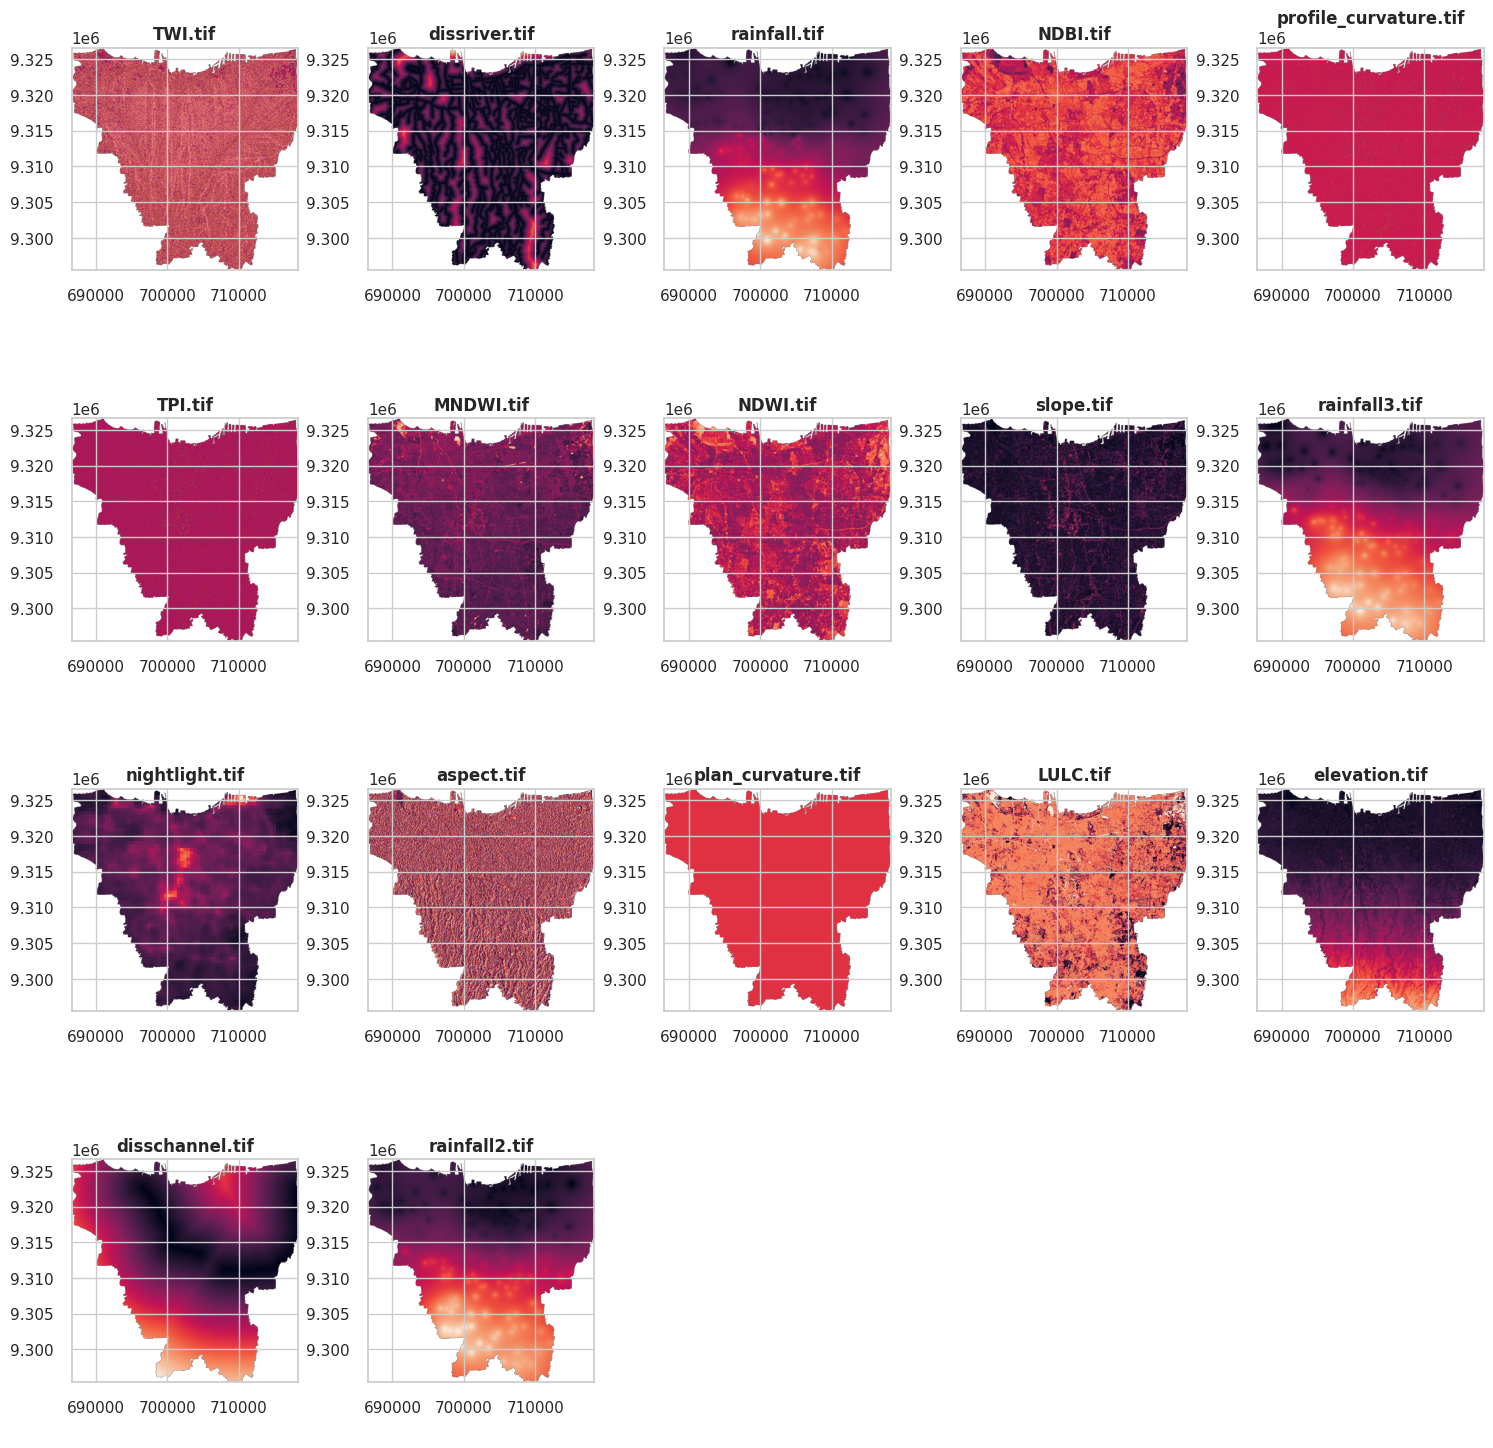

In [236]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_list):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Turn off empty subplots if any
for j in range(len(raster_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [237]:
print(raster_list)

['/content/raster/TWI.tif', '/content/raster/dissriver.tif', '/content/raster/rainfall.tif', '/content/raster/NDBI.tif', '/content/raster/profile_curvature.tif', '/content/raster/TPI.tif', '/content/raster/MNDWI.tif', '/content/raster/NDWI.tif', '/content/raster/slope.tif', '/content/raster/rainfall3.tif', '/content/raster/nightlight.tif', '/content/raster/aspect.tif', '/content/raster/plan_curvature.tif', '/content/raster/LULC.tif', '/content/raster/elevation.tif', '/content/raster/disschannel.tif', '/content/raster/rainfall2.tif']


# Random Forest
## Exploratory Data Analysis

In [211]:
pip install geopandas

In [238]:
!pwd

/content


In [239]:
sampling = r'/content/Sampling.shp'

In [240]:
import geopandas as gpd

In [241]:
sampling = gpd.read_file(sampling)

In [242]:
sampling.head()

,OBJECTID,ID,Class,elevation,LULC,MNDWI,NDBI,NDWI,nightlight,plan_curva,...,rainfall,rainfall2,rainfall3,slope,TPI,TWI,dissriver,disschanne,aspect,geometry
0,1,1,1,19.108100,4.37674,-0.252942,0.076071,-0.017718,56.79,-0.058471,...,4138.23,3185.28,4968.52,4.235720,-1.997260,8.54106,375.7670,1382.710,3.280560,POINT (701369.510 9312695.831)
1,2,2,1,0.484954,4.00000,-0.369595,0.113560,-0.072703,39.97,-0.048496,...,4135.06,3061.03,4803.40,1.147960,-4.975890,13.57670,305.5740,401.243,4.035530,POINT (700081.126 9314170.987)
2,3,3,1,8.087520,4.00000,-0.334910,0.113120,-0.082920,46.67,0.048002,...,4138.08,3131.50,4908.74,1.046090,-0.275937,11.94610,92.0864,975.186,6.155160,POINT (700121.837 9313451.405)
3,4,4,1,8.575090,4.30783,-0.346720,-0.042982,0.062265,46.67,0.009382,...,4138.04,3130.92,4908.17,1.690270,0.761410,28.37690,85.7956,934.938,3.062420,POINT (700129.401 9313462.440)
4,5,5,1,6.835240,1.97934,-0.416964,0.019103,0.002886,42.91,-0.045120,...,4112.15,3043.51,4776.97,0.938002,-0.457772,11.83280,54.2461,135.627,0.762576,POINT (700335.004 9314291.779)


In [243]:
sampling.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

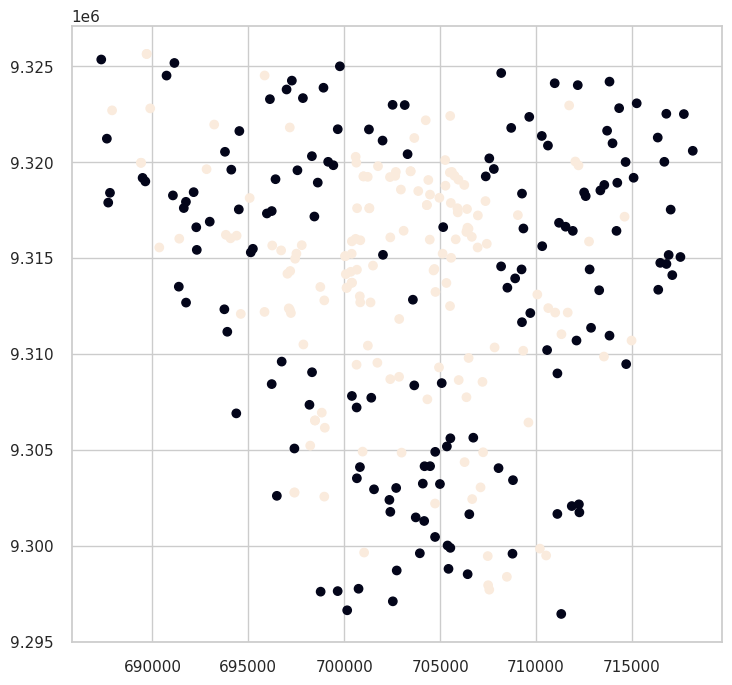

In [244]:
sampling.plot('Class')

In [245]:
batas = gpd.read_file('/content/Batas.shp')

In [246]:
batas.head()

,OBJECTID,GID_1,Shape_Leng,Shape_Area,geometry
0,1,IDN.7_1,203057.067677,6.429058e+08,"POLYGON ((690976.833 9326610.342, 691001.248 9..."


<Axes: >

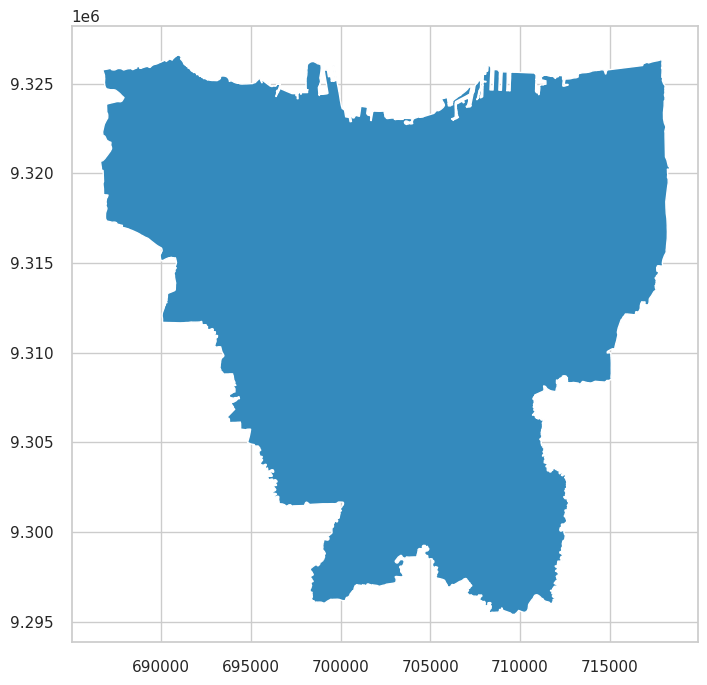

In [247]:
batas.plot()

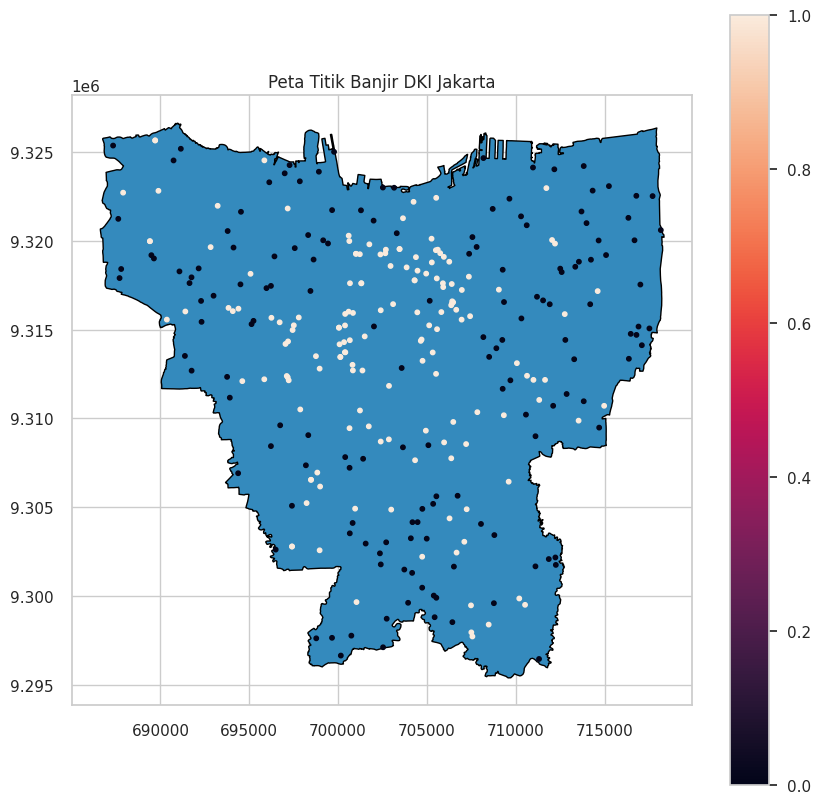

In [248]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
batas.plot(ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

In [249]:
kota = gpd.read_file('/content/Kota.shp')

In [250]:
kota.head(5)

,OBJECTID,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,Shape_Leng,Shape_Area,geometry
0,1,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.1_1,Cengkareng,None,None,Kecamatan,Sub-district,3174070,None,31193.629963,2.623779e+07,"POLYGON ((688151.367 9316917.839, 688158.156 9..."
1,2,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.2_1,Grogolpetamburan,None,None,Kecamatan,Sub-district,3174040,None,14181.380194,1.082747e+07,"POLYGON ((697322.416 9315982.077, 697309.738 9..."
2,3,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.3_1,Kalideres,None,None,Kecamatan,Sub-district,3174080,None,29234.253123,2.846948e+07,"POLYGON ((688151.367 9316917.839, 688131.109 9..."
3,4,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.4_1,Kebonjeruk,None,None,Kecamatan,Sub-district,3174020,None,22793.871309,1.715234e+07,"POLYGON ((696624.443 9312572.887, 696622.724 9..."
4,5,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.5_1,Kembangan,None,None,Kecamatan,Sub-district,3174010,None,31403.047443,2.519941e+07,"POLYGON ((694765.439 9311926.177, 694754.388 9..."


In [251]:
kota.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

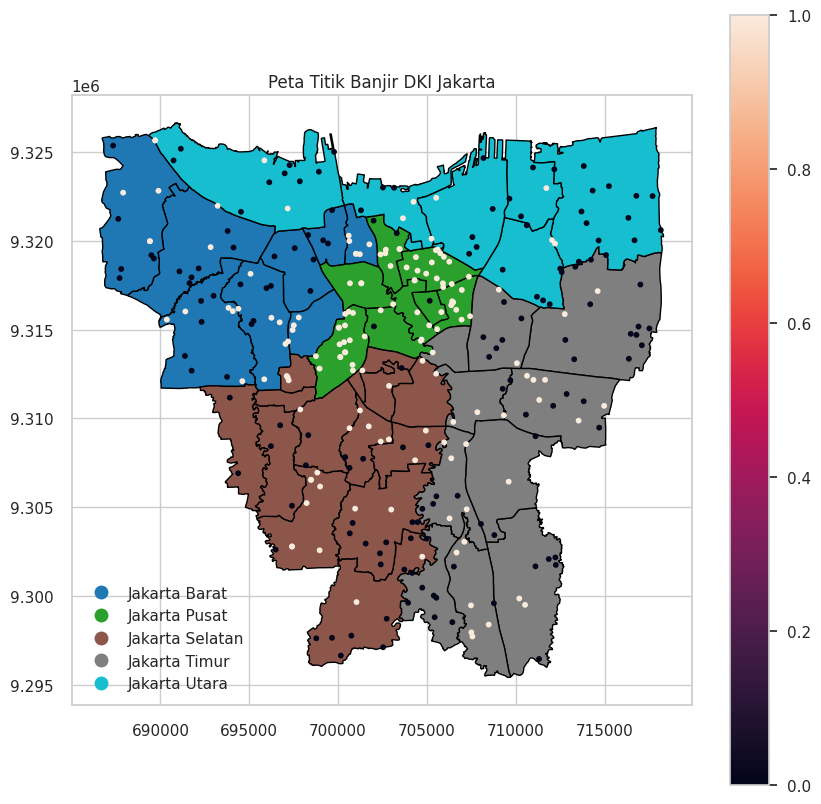

In [252]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
kota.plot(column = 'NAME_2', ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

### Pada machine learning kali ini, langsung menggunakan data shp sampling
isinya area flood dan non flood, tanpa menggunakan data csv
atau data tidak diekstrak tapi langsung dianalisis machine learning

In [ ]:
# sampling.to_file("/content/sampling.shp")

In [ ]:
# sampling.to_csv("/content/sampling.csv")

In [ ]:
# sampling = pd.read_csv("/content/sampling.csv")

# Split Data

In [253]:
sampling = sampling.drop(['OBJECTID', 'ID', 'geometry'], axis= 1)

In [254]:
sampling.head()

,Class,elevation,LULC,MNDWI,NDBI,NDWI,nightlight,plan_curva,profile_cu,rainfall,rainfall2,rainfall3,slope,TPI,TWI,dissriver,disschanne,aspect
0,1,19.108100,4.37674,-0.252942,0.076071,-0.017718,56.79,-0.058471,0.001485,4138.23,3185.28,4968.52,4.235720,-1.997260,8.54106,375.7670,1382.710,3.280560
1,1,0.484954,4.00000,-0.369595,0.113560,-0.072703,39.97,-0.048496,-0.002056,4135.06,3061.03,4803.40,1.147960,-4.975890,13.57670,305.5740,401.243,4.035530
2,1,8.087520,4.00000,-0.334910,0.113120,-0.082920,46.67,0.048002,-0.000568,4138.08,3131.50,4908.74,1.046090,-0.275937,11.94610,92.0864,975.186,6.155160
3,1,8.575090,4.30783,-0.346720,-0.042982,0.062265,46.67,0.009382,0.000180,4138.04,3130.92,4908.17,1.690270,0.761410,28.37690,85.7956,934.938,3.062420
4,1,6.835240,1.97934,-0.416964,0.019103,0.002886,42.91,-0.045120,-0.000991,4112.15,3043.51,4776.97,0.938002,-0.457772,11.83280,54.2461,135.627,0.762576


In [255]:
x = sampling.drop('Class', axis=1)

In [256]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elevation   306 non-null    float64
 1   LULC        306 non-null    float64
 2   MNDWI       306 non-null    float64
 3   NDBI        306 non-null    float64
 4   NDWI        306 non-null    float64
 5   nightlight  306 non-null    float64
 6   plan_curva  306 non-null    float64
 7   profile_cu  306 non-null    float64
 8   rainfall    306 non-null    float64
 9   rainfall2   306 non-null    float64
 10  rainfall3   306 non-null    float64
 11  slope       306 non-null    float64
 12  TPI         306 non-null    float64
 13  TWI         306 non-null    float64
 14  dissriver   306 non-null    float64
 15  disschanne  306 non-null    float64
 16  aspect      306 non-null    float64
dtypes: float64(17)
memory usage: 40.8 KB


In [257]:
y = sampling['Class']

In [258]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 306 entries, 0 to 305
Series name: Class
Non-Null Count  Dtype
--------------  -----
306 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [259]:
def count_categories(feature):
  print(sampling[feature].value_counts())
  plt.figure(figsize=(2, 2))
  sns.countplot(
      x=feature,
      data=sampling,
      palette='Set2'
  )

Class
1    153
0    153
Name: count, dtype: int64


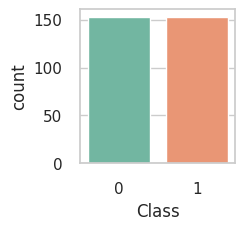

In [260]:
count_categories('Class')

# Correaltions

In [262]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

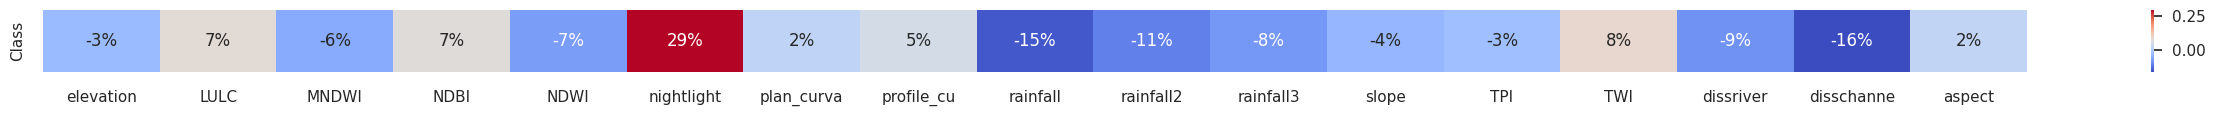

In [263]:
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

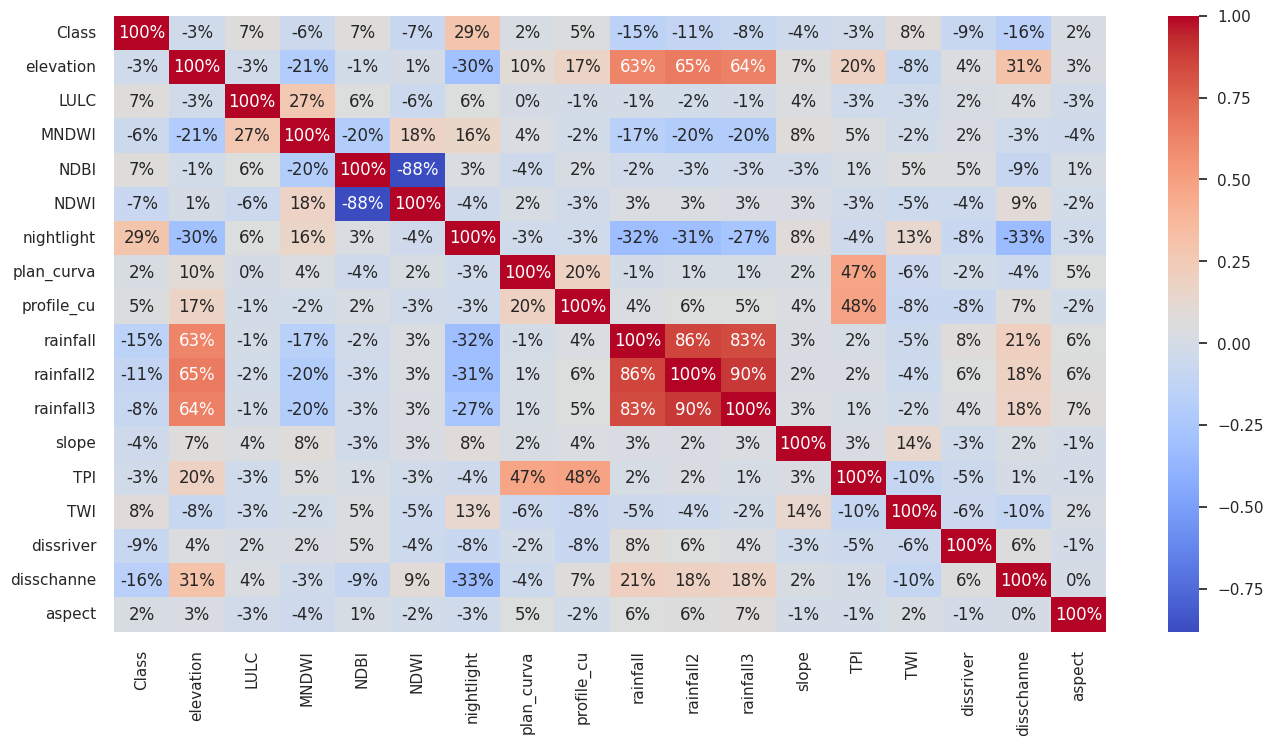

In [265]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('kendall'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

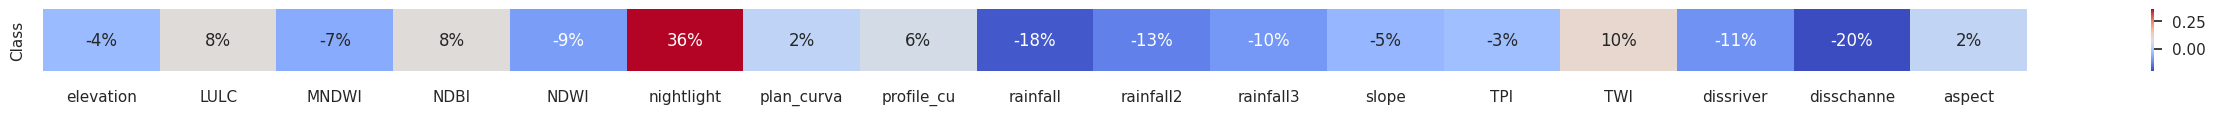

In [266]:
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('spearman').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

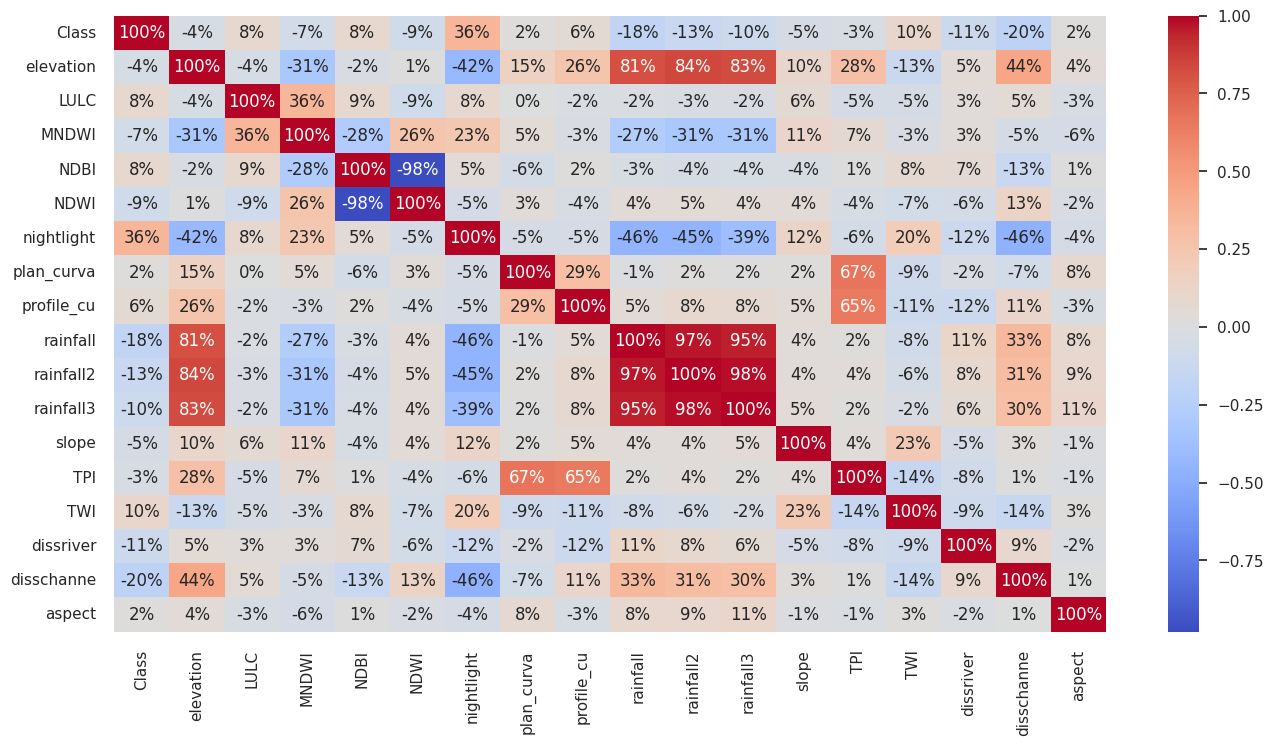

In [267]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('spearman'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

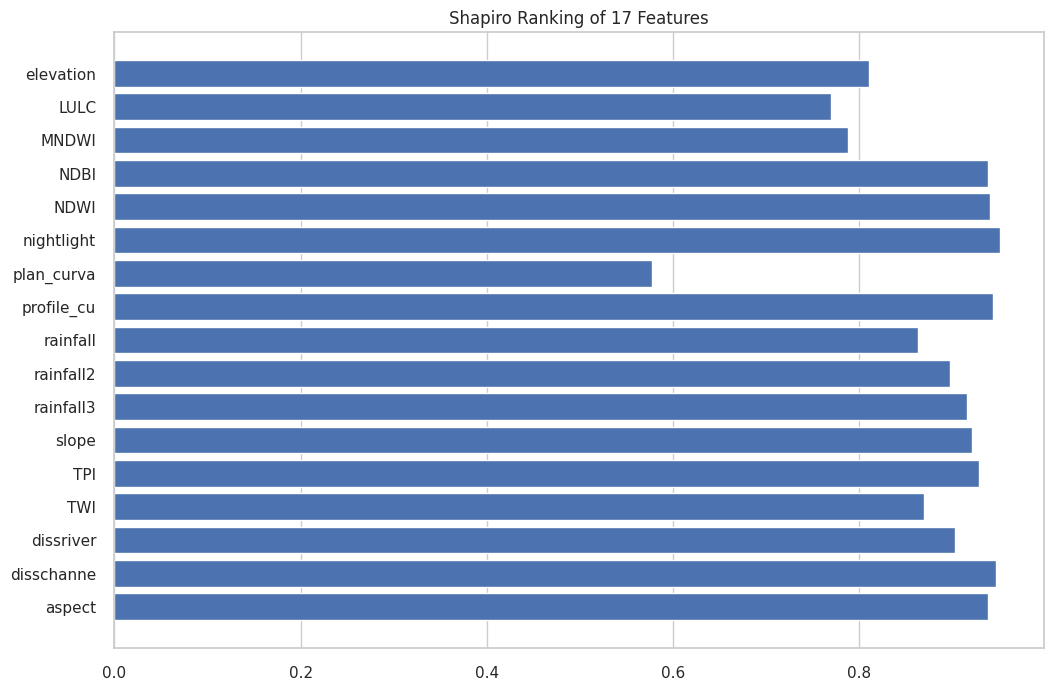

<Axes: title={'center': 'Shapiro Ranking of 17 Features'}>

In [268]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features= x.columns)
visualizer.fit(x, y)           # Fit the data to the visualizer
visualizer.transform(x.values);        # Transform the data
visualizer.show()              # Finalize and render the figure

In [269]:
from scipy.stats import shapiro
# normality test
def normality_test_shapiro(feature):
  stat, p = shapiro(x[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [270]:
for feature in x.columns:
  normality_test_shapiro(feature)

Statistics=0.810, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.769, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.788, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.940, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.951, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.577, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.943, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.897, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.921, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.929, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.903, p=0.000
Sample does not look G

In [271]:
# Anderson-Darling Test
from scipy.stats import anderson

def normality_test_anderson_darling(feature):
  # normality test
  result = anderson(x[feature].values)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [272]:
for feature in x.columns:
  normality_test_anderson_darling(feature)

Statistic: 21.369
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 31.365
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 6.114
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look normal (reject H0)
2.500: 0.906, data does not look normal (reject H0)
1.000: 1.078, data does not look normal (reject H0)
Statistic: 4.579
15.000: 0.569, data does not look normal (reject H0)
10.000: 0.648, data does not look normal (reject H0)
5.000: 0.777, data does not look norma

### Nilai input machine learning tidak boleh negatif. Mengapa?

In [273]:
from sklearn.feature_selection import chi2
### chi2(x,y)[0]

# Start Machine Learning

In [274]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [275]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elevation   306 non-null    float64
 1   LULC        306 non-null    float64
 2   MNDWI       306 non-null    float64
 3   NDBI        306 non-null    float64
 4   NDWI        306 non-null    float64
 5   nightlight  306 non-null    float64
 6   plan_curva  306 non-null    float64
 7   profile_cu  306 non-null    float64
 8   rainfall    306 non-null    float64
 9   rainfall2   306 non-null    float64
 10  rainfall3   306 non-null    float64
 11  slope       306 non-null    float64
 12  TPI         306 non-null    float64
 13  TWI         306 non-null    float64
 14  dissriver   306 non-null    float64
 15  disschanne  306 non-null    float64
 16  aspect      306 non-null    float64
dtypes: float64(17)
memory usage: 40.8 KB


# Train Random Forest Simple Version

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [277]:
# model_rf = RandomForestClassifier(n_estimators=250, random_state=42)
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [278]:
y_pred_rf = model_rf.predict(x_test)

In [279]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.80      0.76      0.78        46
       flood       0.77      0.80      0.79        46

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.78      0.78      0.78        92



In [280]:
print(accuracy_score(y_test, y_pred_rf))

0.782608695652174


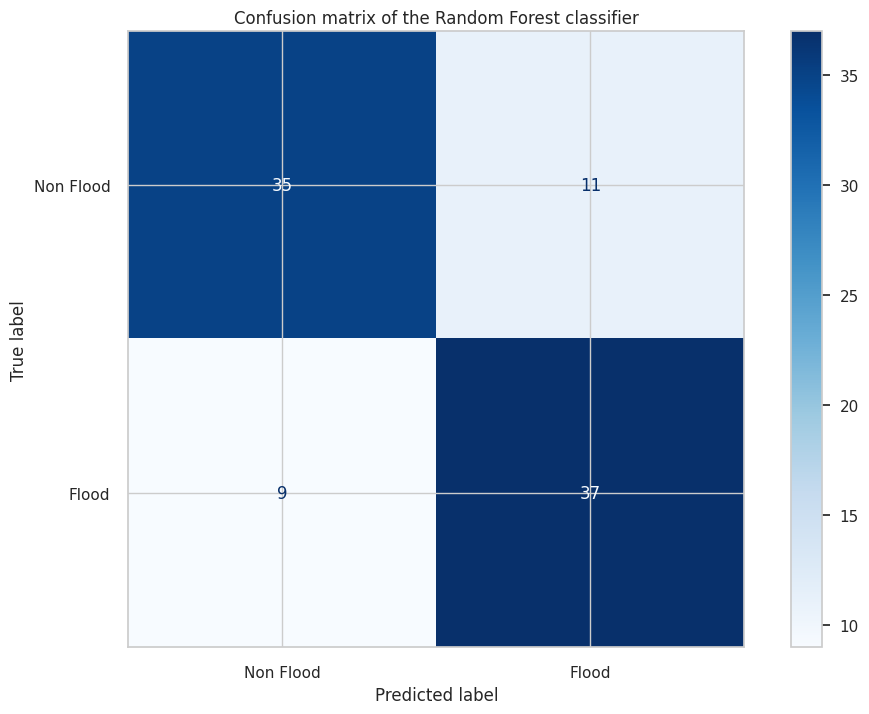

In [281]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

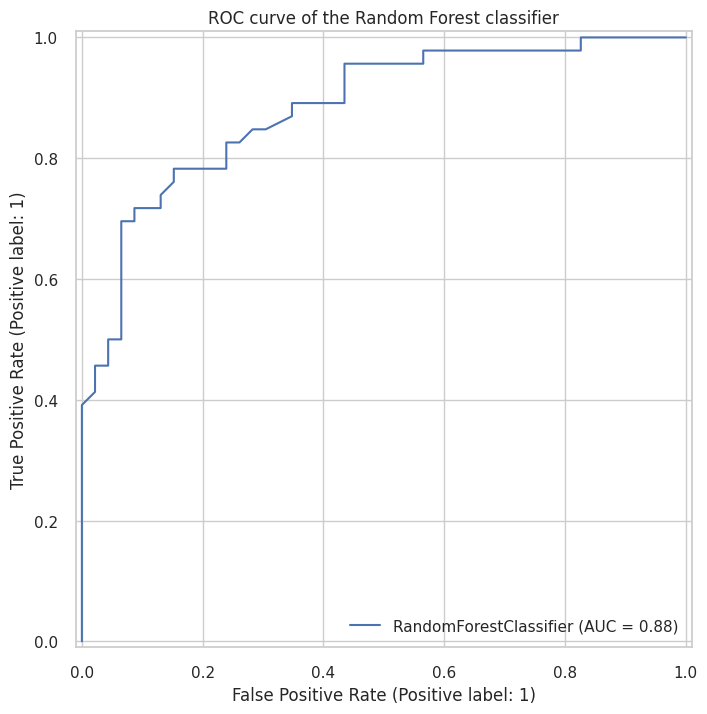

In [282]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_rf, x_test, y_test)
plt.title('ROC curve of the Random Forest classifier')
plt.show()

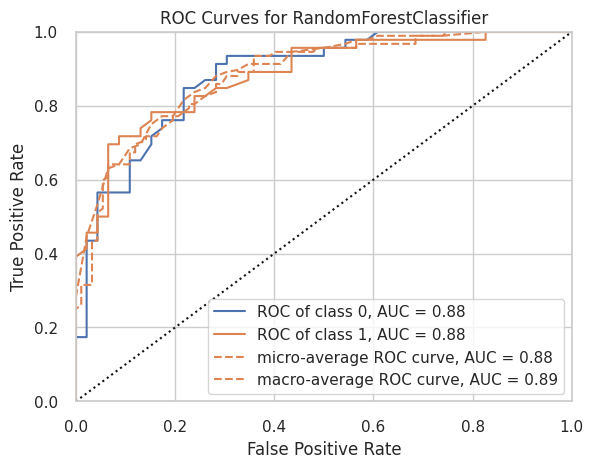

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [283]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_rf,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [284]:
result_rf = pd.DataFrame(y_pred_rf, columns=['Class'])

## Jumlah citra raster harus sama dengan jumlah kolom parameter

In [285]:
result_rf = stack.predict_proba(model_rf)

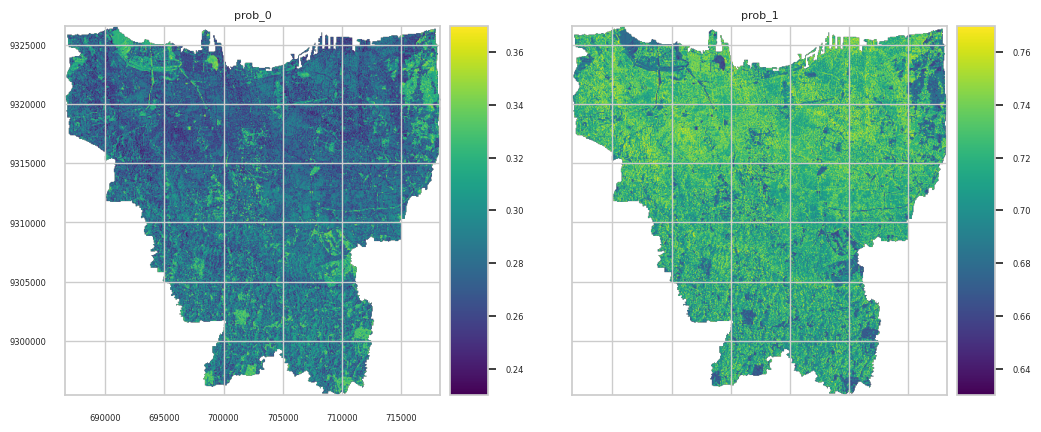

In [286]:
result_rf.plot()
plt.show()

In [287]:
result_rf.write(r"random forest susceptibility.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [random forest susceptibility.tif, random fore...
2        rows                                               1040
3        cols                                               1057
4         res                                       (30.0, 30.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...


In [288]:
print(raster_list)

['/content/raster/TWI.tif', '/content/raster/dissriver.tif', '/content/raster/rainfall.tif', '/content/raster/NDBI.tif', '/content/raster/profile_curvature.tif', '/content/raster/TPI.tif', '/content/raster/MNDWI.tif', '/content/raster/NDWI.tif', '/content/raster/slope.tif', '/content/raster/rainfall3.tif', '/content/raster/nightlight.tif', '/content/raster/aspect.tif', '/content/raster/plan_curvature.tif', '/content/raster/LULC.tif', '/content/raster/elevation.tif', '/content/raster/disschannel.tif', '/content/raster/rainfall2.tif']


# END OF THE DAY
## Ahad, 27th July 2025
Tenyata file shapefile / shp bisa langsung digunakan untuk machine learning
### kurang parameter geology, tanah
### Hasil analisis berbeda ketika menggunakan data kependudukan dan tidak
### LULC masih berupa angka kode penggunaan lahan, belum dikategorikan, sehingga hasilnya berpengaruh terhadap map

